# Pandas Tutorial

### Import Libraries 

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import json

### Open json document

In [2]:
path = "C:\\Users\\mdeleseleuc\\Documents\\usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line.decode('utf-8')) for line in open(path, 'rb')]

### Create a data frame

In [3]:
frame = DataFrame(records)
frame.info()
frame['tz'][:10] #from first row to 10th row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

### Counting Time Zone

In [4]:
tz_counts = frame['tz'].value_counts()

#### Count Top 10 Time Zone 

In [5]:
tz_counts[:10] # from first row to 10th row

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

## Select Multiple Columns 

In [6]:
from numpy.random import randn

df = DataFrame(randn(10, 10), index=range(0,10), columns=['A', 'B', 'C', 'D','E','F','G','H','I','J'])

cols = list(df.loc[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I']) # df.loc[rows, columns]
df[cols]


,A,B,C,E,G,H,I
0,0.384669,-0.330832,-0.574919,1.570310,-1.221755,1.179080,-0.194085
1,-1.277400,1.029275,-1.598296,0.397047,0.234475,1.054908,0.009161
2,0.949726,0.584491,-0.024352,0.201681,-0.555958,-0.675905,-1.574532
3,-0.840697,-0.131566,-0.739522,-1.960427,-0.938186,0.877210,0.692589
4,-0.269616,0.063256,1.308412,2.049237,-1.270625,-2.578670,2.675549
5,0.122485,-0.002204,0.305197,1.968836,0.178242,1.025513,-1.905688
6,0.266261,0.078134,0.633137,-0.930699,-1.685433,0.005600,-0.217683
7,1.508548,2.228639,-3.411782,0.627032,1.158981,-1.201295,-1.091338
8,2.138219,1.023272,0.002718,0.938779,0.339556,-0.452240,1.928843
9,1.273194,1.530215,-0.632540,1.128502,0.060703,-0.089748,1.147362


In [7]:
cols = list(df.ix[:,:2] + df.ix[:,[4]])  #first two columns + 4th colum
df[cols]

,A,B,E
0,0.384669,-0.330832,1.570310
1,-1.277400,1.029275,0.397047
2,0.949726,0.584491,0.201681
3,-0.840697,-0.131566,-1.960427
4,-0.269616,0.063256,2.049237
5,0.122485,-0.002204,1.968836
6,0.266261,0.078134,-0.930699
7,1.508548,2.228639,0.627032
8,2.138219,1.023272,0.938779
9,1.273194,1.530215,1.128502


#### Second method

In [8]:
df.filter(regex='[A-CEG-I]')

,A,B,C,E,G,H,I
0,0.384669,-0.330832,-0.574919,1.570310,-1.221755,1.179080,-0.194085
1,-1.277400,1.029275,-1.598296,0.397047,0.234475,1.054908,0.009161
2,0.949726,0.584491,-0.024352,0.201681,-0.555958,-0.675905,-1.574532
3,-0.840697,-0.131566,-0.739522,-1.960427,-0.938186,0.877210,0.692589
4,-0.269616,0.063256,1.308412,2.049237,-1.270625,-2.578670,2.675549
5,0.122485,-0.002204,0.305197,1.968836,0.178242,1.025513,-1.905688
6,0.266261,0.078134,0.633137,-0.930699,-1.685433,0.005600,-0.217683
7,1.508548,2.228639,-3.411782,0.627032,1.158981,-1.201295,-1.091338
8,2.138219,1.023272,0.002718,0.938779,0.339556,-0.452240,1.928843
9,1.273194,1.530215,-0.632540,1.128502,0.060703,-0.089748,1.147362


##### Alternative

In [9]:
df.filter(regex='[ABCEGHI]')

,A,B,C,E,G,H,I
0,0.384669,-0.330832,-0.574919,1.570310,-1.221755,1.179080,-0.194085
1,-1.277400,1.029275,-1.598296,0.397047,0.234475,1.054908,0.009161
2,0.949726,0.584491,-0.024352,0.201681,-0.555958,-0.675905,-1.574532
3,-0.840697,-0.131566,-0.739522,-1.960427,-0.938186,0.877210,0.692589
4,-0.269616,0.063256,1.308412,2.049237,-1.270625,-2.578670,2.675549
5,0.122485,-0.002204,0.305197,1.968836,0.178242,1.025513,-1.905688
6,0.266261,0.078134,0.633137,-0.930699,-1.685433,0.005600,-0.217683
7,1.508548,2.228639,-3.411782,0.627032,1.158981,-1.201295,-1.091338
8,2.138219,1.023272,0.002718,0.938779,0.339556,-0.452240,1.928843
9,1.273194,1.530215,-0.632540,1.128502,0.060703,-0.089748,1.147362


## Clean the data 

##### Fill NAs & Null Values

In [10]:
clean_tz = frame['tz'].fillna('Missing') # Replace NA with "Missing"
clean_tz[clean_tz == ''] = 'Unknown' # Then replace empty results with "Unknown" 
tz_count = clean_tz.value_counts()
tz_count[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

### Plot Tz Counts

'\nkind : str\n‘line’ : line plot (default)\n‘bar’ : vertical bar plot\n‘barh’ : horizontal bar plot\n‘hist’ : histogram\n‘box’ : boxplot\n‘kde’ : Kernel Density Estimation plot\n‘density’ : same as ‘kde’\n‘area’ : area plot\n‘pie’ : pie plot\n‘scatter’ : scatter plot\n‘hexbin’ : hexbin plot\n\nrot : int, default None\nRotation for ticks (xticks for vertical, yticks for horizontal plots)\n'

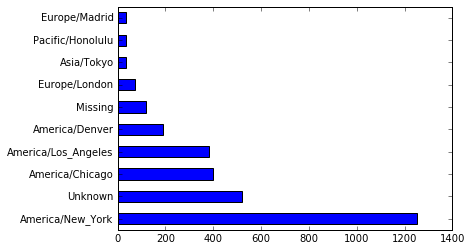

In [11]:
%matplotlib inline 
# Necessary to display the graphic in Jupyter Notebook

tz_count[:10].plot(kind = 'barh', rot = 0)

"""
kind : str
‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot

rot : int, default None
Rotation for ticks (xticks for vertical, yticks for horizontal plots)
"""

### Parse a string 

In [12]:
frame["a"][:10] # Long string with too much information

# Note: frame["column name"]["Rows"] because I named the dataframe "frame" (yeah...)

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [13]:
results = Series([x.split()[0] for x in frame.a.dropna()])

# Series is a one-dimensional labeled array capable of holding any data type 
# (integers, strings, floating point numbers, Python objects, etc.)

In [14]:
# Why .split()[0]? Because want first substring 
# Details:

strg = frame["a"][:1] # first row
print ("Result 1:"), print(strg)
print('')

strg = strg[0] # content of the dataframe (to be able to pass a string in the function below)
print ("Result 2:"), print(strg.split())
print('')

print ("Result 3:"), print(strg.split()[0])


Result 1:
0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

Result 2:
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.78', 'Safari/535.11']

Result 3:
Mozilla/5.0


(None, None)

In [15]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Decompose Top Time Zones by Windows vs. Non- Windows Users

In [16]:
import numpy as np

# Exclude missing agents ("agents" = column "a")
cframe = frame[frame.a.notnull()] 

# Si contient le mot "Windows" dans la colonne "a(gent)", attribut lui "Windows" comme OS
operating_system = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows") 

operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

##### Group by tz and OS

In [17]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [18]:
agg_counts = by_tz_os.size().unstack().fillna(0) 

# Unstack = reshap the result into a table


In [19]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


##### Select the top overall time zones.

In [20]:
# Create index to sort the tz in ascending order

indexer = agg_counts.sum(1).argsort()

# .sum(1) = sum the rows:
# indexer = agg_counts.sum(1)
# indexer[:10]

In [21]:
indexer[:10] # indexes for the first 10 rows

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

##### Use *take* to select the rows in the index order

In [22]:
count_subset = agg_counts.take(indexer)[-10:] # slice off the last 10 rows

count_subset # results in ascending order (Not Windows + Windows)

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


##### Plot the result

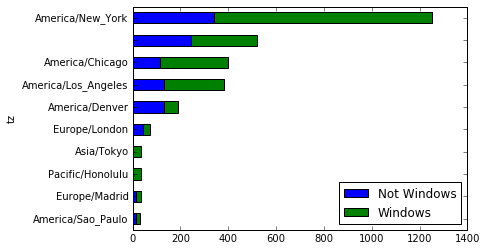

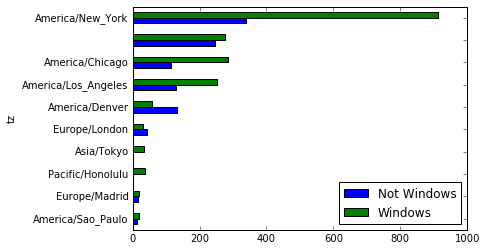

In [23]:
%matplotlib inline 

count_subset.plot(kind = "barh", stacked = True)

count_subset.plot(kind = "barh", stacked = False)

##### Calculate relative percentage by normalizing the rows 

In [24]:
# Percentage of each column in the row total: 
normed_subset = count_subset.div(count_subset.sum(1), axis = 0) #div() == Floating division of dataframe 

normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


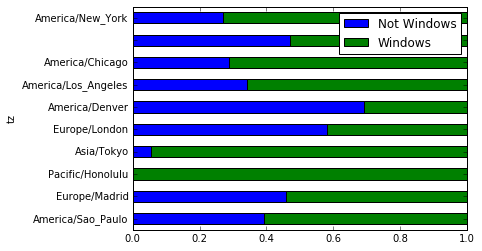

In [25]:
normed_subset.plot(kind = "barh", stacked = True)

## MovieLens 1M Data Set

##### Collection of movie ratings

In [26]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] # specify the names you want to give to the columns below

users = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\users.dat', sep = '::', header = None, 
                      names = unames, engine='python')

In [27]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\ratings.dat', sep = '::', header = None, 
                        names = rnames, engine='python')

In [28]:
mnames = ["movie_id", 'title', 'genres']

movies = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\movies.dat', sep = '::', header = None, 
                        names = mnames, engine='python')

In [29]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [30]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [31]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#### Merge data into one table

In [32]:
data = pd.merge(pd.merge(ratings,users),movies) # merge ratings and users first then the result with movies
# panda infers which columns to use as the merge (or join) keys based on overlapping names

In [33]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


#### Mean movie ratings by gender

In [34]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc = 'mean') 

In [35]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


#### Filter down to movies that received at least x (250) ratings

In [36]:
ratings_by_title = data.groupby('title').size() # Equivalent of select title, count(*) from data group by title

In [37]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [38]:
# index of titles receiving at least 250 ratings

active_titles = ratings_by_title.index[ratings_by_title >= 250] 

In [39]:
active_titles[-1] # Get the last element of the list

# The some_list[-n] syntax gets the nth-to-last element

'eXistenZ (1999)'

In [40]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

##### Use index created above to select rows from mean_ratings

In [41]:
mean_ratings = mean_ratings.ix[active_titles]

In [42]:
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


#### Top films among female viewers

In [43]:
top_female_rating = mean_ratings.sort_values(by = 'F', ascending = False) # Equivalent of Select ... order by F desc

In [44]:
top_female_rating [:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

#### Find movies that are most divise between male and female 

In [45]:
# Create new column with rating diff between sex 

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'] 

In [47]:
# Sort by diff to get the movies with the greatest difference 

sorted_by_diff = mean_ratings.sort_values(by = 'diff') 

# ascending = False not used because we want the movies preferred by women i.e. results < 0 (M-F < 0 if F > M) 

In [50]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [53]:
# Movies preferred by men that women didn't rate as highly 

# Reverse orders of rows, take first 15 rows

sorted_by_diff[::-1][:15] # [::-1] reverse array 

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [56]:
# Alternative Method

sorted_by_diff_M = mean_ratings.sort_values(by = 'diff', ascending = False)

sorted_by_diff_M[:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


#### Movies with the most disagreement among viewers, independant of gender

In [57]:
# Disagreement = variance or standard deviation of the ratings

# SD of rating group by title

rating_std_by_title = data.groupby('title')['rating'].std()

In [58]:
rating_std_by_title[:15]

title
$1,000,000 Duck (1971)                 1.092563
'Night Mother (1986)                   1.118636
'Til There Was You (1997)              1.020159
'burbs, The (1989)                     1.107760
...And Justice for All (1979)          0.878110
1-900 (1994)                           0.707107
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
187 (1997)                             1.057919
2 Days in the Valley (1996)            0.921592
20 Dates (1998)                        1.151943
20,000 Leagues Under the Sea (1954)    0.869685
Name: rating, dtype: float64

In [66]:
# Filter down to active titles

rating_std_by_title.ix[active_titles][:15]

title
'burbs, The (1989)                     1.107760
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
2 Days in the Valley (1996)            0.921592
20,000 Leagues Under the Sea (1954)    0.869685
2001: A Space Odyssey (1968)           1.042504
2010 (1984)                            0.946618
28 Days (2000)                         0.920278
39 Steps, The (1935)                   0.853501
54 (1998)                              1.035481
7th Voyage of Sinbad, The (1958)       0.931531
8MM (1999)                             1.113432
Name: rating, dtype: float64

In [124]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [69]:
# Order Series by value in descending order

rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Exercices perso

In [74]:
# Count of movies per genre

data['genres'].value_counts()[:10]

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: genres, dtype: int64

In [94]:
# Average rating by genre

data.pivot_table('rating', index='genres', aggfunc = 'mean')[:10]

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Action|Adventure|Comedy                          3.095330
Name: rating, dtype: float64

In [99]:
# Standard deviation of rating by genre

group_by_genres = data.groupby(by = ['genres'])['rating'].std()

group_by_genres[:10].sort_values(ascending = False)

genres
Action|Adventure                                 1.171912
Action|Adventure|Children's|Comedy               1.111044
Action|Adventure|Animation|Children's|Fantasy    1.106791
Action|Adventure|Children's|Fantasy              1.074399
Action|Adventure|Animation|Horror|Sci-Fi         1.073581
Action|Adventure|Comedy                          1.066915
Action                                           1.052655
Action|Adventure|Children's|Sci-Fi               1.044111
Action|Adventure|Animation                       0.948470
Action|Adventure|Children's                      0.638775
Name: rating, dtype: float64

In [151]:
# Standard deviation of rating by genre and gender

group_by_genres = data.groupby(by = ['genres', 'gender'])['rating'].std()

group_by_genres[:10].sort_values(ascending = False)

genres                                         gender
Action|Adventure|Animation|Horror|Sci-Fi       F         1.226633
Action|Adventure                               M         1.175769
                                               F         1.155230
Action|Adventure|Animation                     F         1.115813
Action                                         F         1.080733
Action|Adventure|Animation|Children's|Fantasy  M         1.075081
                                               F         1.062096
Action|Adventure|Animation|Horror|Sci-Fi       M         1.052273
Action                                         M         1.048401
Action|Adventure|Animation                     M         0.893944
Name: rating, dtype: float64

In [153]:
group_by_genres[0]

1.0807334804058146

In [157]:
# Type

group_by_genres.__class__.__name__

'Series'

In [184]:
# Filtering result by gender

 # http://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe

df = group_by_genres.reset_index() # Transform group_by_genres into workable dataframe

df[df['gender'] == 'F'].head()

,genres,gender,rating
0,Action,F,1.080733
2,Action|Adventure,F,1.155230
4,Action|Adventure|Animation,F,1.115813
6,Action|Adventure|Animation|Children's|Fantasy,F,1.062096
8,Action|Adventure|Animation|Horror|Sci-Fi,F,1.226633


In [185]:
# A look at the new data frame

df.head(5)

,genres,gender,rating
0,Action,F,1.080733
1,Action,M,1.048401
2,Action|Adventure,F,1.155230
3,Action|Adventure,M,1.175769
4,Action|Adventure|Animation,F,1.115813


### US Baby Names 1880-2010

In [ ]:
# Data about frequency of baby names from 1880 through the present

# Data: https://www.ssa.gov/oact/babynames/limits.html

# Path: C:\Users\mdeleseleuc\Documents\Babynames\names

In [236]:
# Read all the files 

 # Source: http://stackoverflow.com/questions/36617464/pandas-add-a-new-column-identifier-when-reading-multiple-files

import glob

path = r'C:\Users\mdeleseleuc\Documents\Babynames\names'
allFiles = glob.glob(path + '/*.txt')
list_ = []
column_names = ['Name','Sex', 'Count']
Year = 1880

for i, file_ in enumerate(allFiles):
    data = pd.read_csv(file_, sep = ',', header = None, names = column_names)
    data['Year'] = Year + i  
    list_.append(data)

In [237]:
# Concat the results from the different documents

Final_data = pd.concat(list_, ignore_index=True)

In [240]:
# Type?

Final_data.__class__.__name__

'DataFrame'

In [269]:
# Range of years (do I have them all?)

min_date = Final_data.Year.min()
max_date = Final_data.Year.max()

print("The first date is \x1b[31m\"%s\"\x1b[0m and last date is \x1b[31m\"%s\"\x1b[0m" % (min_date, max_date))

The first date is "1880" and last date is "2015"
